In [32]:
import numpy as np
import scipy.sparse as sp
import Hamiltonian as ham
import Evolution as evol
from matplotlib import pyplot as plt

In [ ]:
#Hamiltonian Params Traverse Field Ising model
n_qubits=8
J=1
h=1

#trotter params
H,H_trot=ham.TFIM(J,h,n_qubits)
EH,psiH=np.linalg.eigh(H.todense())
E_gs=EH[0]
psi_gs=psiH[:,0]

#evolution parameters
dt=0.25
N=8
tmax=dt*N
t=0 + np.arange(0, N+1) *dt

#initial state
psi_0=sp.csc_matrix((2**n_qubits,1),dtype=complex)
psi_0[0,0]=1
psi_0=psi_0/sp.linalg.norm(psi_0)

#QITE and ITE evolution
D=2
EQ,psi_QITE,a = evol.QITE(n_qubits,H,H_trot,D,psi_0,N,dt,vervose=False)
t_ITE,EITE=evol.ITE(H,psi_0,tmax,51)

#Fidelity of QITE
F=np.zeros(N+1)
for i in range(N+1):
    F[i] = (np.abs(psi_gs.T@psi_QITE[:,i].todense())**2)[0,0]


Succesfull Troterization
The Trotterization consists of 8 terms with the starting qubit of each piece at [0 1 2 3 4 5 6 7]
Each single qubit term appears 2 times


/home/andreu/Dropbox/QITE/Qite Algorithms/UnderstandingQITE/.venv/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


Using Real Pauli Strings
The number of Paulis is  6
Sparse Routine


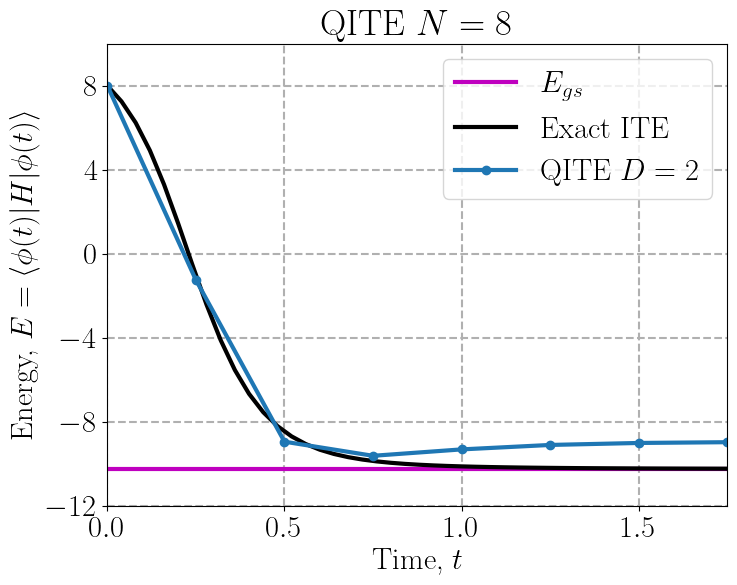

In [34]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    "text.usetex": True,
})
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.plot(t,np.zeros(N+1)+np.real(E_gs),'-m',linewidth=3,label='$E_{gs}$')
plt.plot(t_ITE,np.real(EITE),'-k',linewidth=3,label='Exact ITE')
plt.plot(t,np.real(EQ),'-o',linewidth=3,label='QITE $D=%d$'%D)
#Aggragated plots for the paper
#plt.plot(t,np.real(E2),'-o',linewidth=3,label='QITE $D=%d$'%2)
#plt.plot(t,np.real(E4),'-o',linewidth=3,label='QITE $D=%d$'%4)
#plt.plot(t,np.real(E6),'-o',linewidth=3,label='QITE $D=%d$'%6)
#plt.plot(t_var[0],np.real(E_var[0]),'-o',linewidth=3,label='varQITE')
plt.xlabel("Time, $t$")
plt.ylabel("Energy, $E=\\langle \\phi(t)|H|\\phi(t)\\rangle$")
plt.title("QITE $N=%d$"%n_qubits)
plt.xlim(0, (N-1)*dt)
plt.ylim([-12,10])
plt.yticks(np.arange(-12, 10, step=4))
plt.legend()
plt.grid(linestyle = '--', linewidth = 1.5)

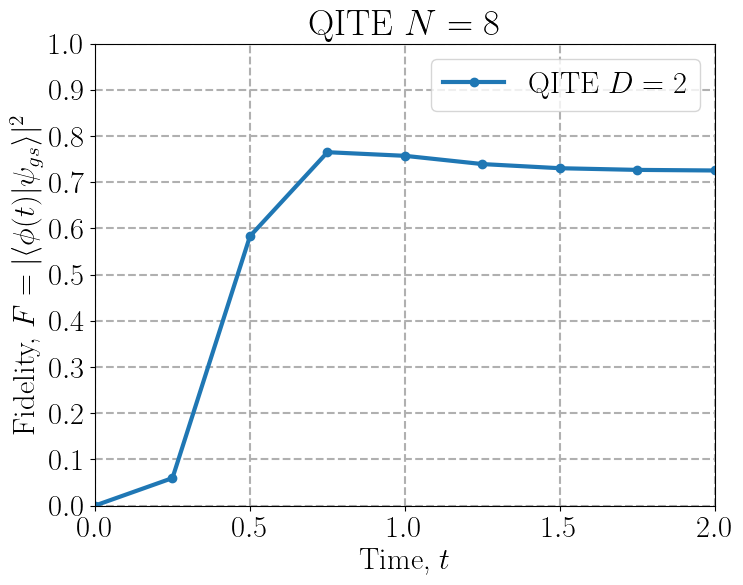

In [ ]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    "text.usetex": True,
})
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.plot(t,np.real(F),'-o',linewidth=3,label='QITE $D=%d$'%D)
#Aggragated plots for the paper
#plt.plot(t,np.real(F2),'-o',linewidth=3,label='QITE $D=%d$'%2)
#plt.plot(t,np.real(F4),'-o',linewidth=3,label='QITE $D=%d$'%4)
#plt.plot(t,np.real(F6),'-o',linewidth=3,label='QITE $D=%d$'%6)
#plt.plot(t_var[0]/2,np.real(F_var[0]),'-o',linewidth=3,label='varQITE')
plt.xlabel("Time, $t$")
plt.ylabel("Fidelity, $F=|\\langle \\phi(t)|\\psi_{gs}\\rangle|^2$")
plt.title("QITE $N=%d$"%n_qubits)
plt.xlim(0, N*dt)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.grid(linestyle = '--', linewidth = 1.5)
#plt.savefig('paper/qite_TFIM_F_N8.png')
